In [ ]:
import pandas as pd
import nltk
nltk.download('all')
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
data = pd.read_csv('/content/news.csv')

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
data.shape

(6335, 4)

#Data Description

In [ ]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0  ... label
0           8476  ...  FAKE
1          10294  ...  FAKE
2           3608  ...  REAL
3          10142  ...  FAKE
4            875  ...  REAL
...          ...  ...   ...
6330        4490  ...  REAL
6331        8062  ...  FAKE
6332        8622  ...  FAKE
6333        4021  ...  REAL
6334        4330  ...  REAL

[6335 rows x 4 columns]>

In [ ]:
X=data.drop('label',axis=1)


In [ ]:
X.head

<bound method NDFrame.head of       Unnamed: 0  ...                                               text
0           8476  ...  Daniel Greenfield, a Shillman Journalism Fello...
1          10294  ...  Google Pinterest Digg Linkedin Reddit Stumbleu...
2           3608  ...  U.S. Secretary of State John F. Kerry said Mon...
3          10142  ...  — Kaydee King (@KaydeeKing) November 9, 2016 T...
4            875  ...  It's primary day in New York and front-runners...
...          ...  ...                                                ...
6330        4490  ...  The State Department told the Republican Natio...
6331        8062  ...  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332        8622  ...   Anti-Trump Protesters Are Tools of the Oligar...
6333        4021  ...  ADDIS ABABA, Ethiopia —President Obama convene...
6334        4330  ...  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[6335 rows x 3 columns]>

In [ ]:
y=data['label']

In [ ]:
y.head

<bound method NDFrame.head of 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object>

In [ ]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

Feature Extraction



CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data=data.dropna()

In [ ]:
messages=data.copy()

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
messages.head(20)

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,5,6903,"Tehran, USA","\r\nI’m not an immigrant, but my grandparent...",FAKE
6,6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
y=messages['label']

In [ ]:
# messages['title'][6]

In [ ]:
import re

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

 Applying Countvectorizer
 Creating the Bag of Words model

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [ ]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
corpus[5]

'tehran usa'

In [ ]:
corpus

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter',
 'tehran usa',
 'girl horrifi watch boyfriend left facetim',
 'britain schindler die',
 'fact check trump clinton command chief forum',
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa glimps fire elud hillari clinton campaign',
 'donald trump shockingli weak deleg game somehow got even wors',
 'strong solar storm tech risk today news oct video',
 'way america prepar world war',
 'trump take cruz lightli',
 'women lead differ',
 'shock michel obama hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news',
 'iran bill obama like',
 'chart explain everyth need know partisanship america',
 'slipperi slope trump propos ban muslim',
 'episod sunday wire hail deplor special g

splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
cv.get_feature_names()[:-20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abdullah',
 'abedin',
 'abedin weiner',
 'abedin weiner laptop',
 'abil',
 'aboard',
 'abolish',
 'abort',
 'abort answer',
 'absolut',
 'abstain',
 'abstain un',
 'abstain un vote',
 'absurd',
 'abus',
 'abus power',
 'accept',
 'accept elect',
 'accept elect result',
 'accept foreign',
 'access',
 'access pipelin',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acquit',
 'acquit malheur',
 'acquit malheur wildlif',
 'acquitt',
 'acr',
 'across',
 'across countri',
 'across us',
 'act',
 'act like',
 'action',
 'activ',
 'activist',
 'actual',
 'ad',
 'ad job',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'admit zika',
 'adult',
 'advanc',
 'advanc mosul',
 'advantag',
 'advert',
 'advertis',
 'advis',
 'advoc',
 'affair',
 'affect',
 'affili',
 'afford',
 'afghan',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'african american',
 'ag',
 'ag lynch',
 'a

In [ ]:
cv.get_params

<bound method BaseEstimator.get_params of CountVectorizer(max_features=5000, ngram_range=(1, 3))>

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
count_df

,abandon,abc,abc news,abdullah,abedin,abedin weiner,abedin weiner laptop,abil,aboard,abolish,abort,abort answer,absolut,abstain,abstain un,abstain un vote,absurd,abus,abus power,accept,accept elect,accept elect result,accept foreign,access,access pipelin,accid,accident,accord,account,accus,accus trump,achiev,acknowledg,acquit,acquit malheur,acquit malheur wildlif,acquitt,acr,across,across countri,...,ww,ye,year,year ago,year dope,year jail,year jail film,year new,year new video,year obama,year old,year old girl,yemen,yesterday,yet,yet anoth,yield,york,york primari,york prison,york time,yorker,young,young women,youth,youtub,zakharova,zealand,zero,zika,zika scaremong,zika scaremong washington,zika viru,zika viru caus,zika viru harmless,zionist,zionist stoog,zone,zuckerberg,zuess
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4240,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



<h3>Confusion Matrix</h3>
<br>
<a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html">Source</a>
<br> 
This function prints and plots the confusion matrix.
Normalization can be applied by setting normalize=True.
  

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Multinomial Naive Bayes Algo

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work. Parameters alphafloat, default=1.0.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.818
Confusion matrix, without normalization


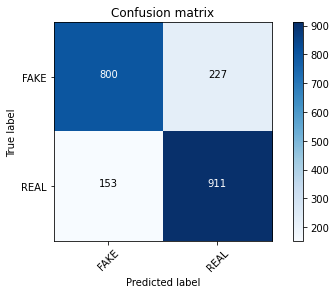

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

81% accuracy for the model MultinomialNB

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8182687709230033

Passive Regressor Classifier - Powerful Algorithm

Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier




In [ ]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.771
Confusion matrix, without normalization


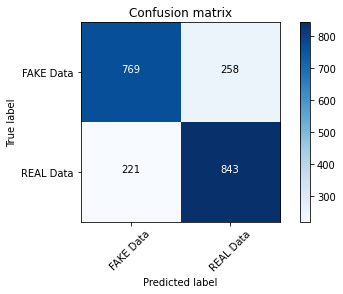

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Multinomial Classifier with Hyperparameter

In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score : 0.8087039693926351
Alpha: 0.1, Score : 0.8254423720707795
Alpha: 0.2, Score : 0.8263988522238164
Alpha: 0.30000000000000004, Score : 0.825920612147298
Alpha: 0.4, Score : 0.8254423720707795
Alpha: 0.5, Score : 0.8249641319942611
Alpha: 0.6000000000000001, Score : 0.8240076518412243
Alpha: 0.7000000000000001, Score : 0.8211382113821138
Alpha: 0.8, Score : 0.8206599713055954
Alpha: 0.9, Score : 0.820181731229077


In [ ]:
feature_names = cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.903844858984253, 'trump'),
 (-4.316600109925942, 'clinton'),
 (-4.646044205168046, 'obama'),
 (-4.832476249478002, 'gop'),
 (-5.054264480955201, 'hillari'),
 (-5.174024639131075, 'donald'),
 (-5.182542578196378, 'donald trump'),
 (-5.191133696328695, 'debat'),
 (-5.310103803834397, 'republican'),
 (-5.3198695064457215, 'say'),
 (-5.391037741058518, 'hillari clinton'),
 (-5.401631060460184, 'new'),
 (-5.502387353357099, 'sander'),
 (-5.526226384533151, 'cruz'),
 (-5.641148618720244, 'state'),
 (-5.6685851819474, 'hous'),
 (-5.6685851819474, 'campaign'),
 (-5.711205268654788, 'democrat'),
 (-5.81834126698385, 'iran'),
 (-5.851184941552997, 'win')]

In [ ]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-10.049221962332227, 'abc news'),
 (-10.049221962332227, 'abedin'),
 (-10.049221962332227, 'abedin weiner'),
 (-10.049221962332227, 'abedin weiner laptop'),
 (-10.049221962332227, 'abil'),
 (-10.049221962332227, 'abstain'),
 (-10.049221962332227, 'abstain un'),
 (-10.049221962332227, 'abstain un vote'),
 (-10.049221962332227, 'accept foreign'),
 (-10.049221962332227, 'access pipelin'),
 (-10.049221962332227, 'achiev'),
 (-10.049221962332227, 'acquit'),
 (-10.049221962332227, 'acquit malheur'),
 (-10.049221962332227, 'acquit malheur wildlif'),
 (-10.049221962332227, 'acquitt'),
 (-10.049221962332227, 'across countri'),
 (-10.049221962332227, 'act like'),
 (-10.049221962332227, 'add'),
 (-10.049221962332227, 'addict'),
 (-10.049221962332227, 'adhd'),
 (-10.049221962332227, 'admit zika'),
 (-10.049221962332227, 'advanc mosul'),
 (-10.049221962332227, 'advert'),
 (-10.049221962332227, 'advertis'),
 (-10.049221962332227, 'affili'),
 (-10.049221962332227, 'ag lynch'),
 (-10.049221962332227

Hence the conclusion is Multinomial Naive Bayes with Hyperparameter is a good approach for this dataset.

In [ ]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('model.pkl', 'rb'))